<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 11: **Covariância e correlação**
____

**Covariância e correlação de Pearson**

In [4]:
solo <- read.csv("https://raw.githubusercontent.com/arsilva87/statsbook/main/datasets/camadassolo.csv", header = TRUE)
attach(solo)

In [4]:
head(solo)

,US,DS,RP,CO,Argila,Tensao,Camada
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1,6.85,1.77,4.37,9.94,16,83.0,0-20
2,10.61,1.58,1.64,26.89,13,64.7,0-20
3,6.63,1.79,5.15,9.94,18,93.5,0-20
4,6.63,1.78,4.83,9.94,18,87.5,0-20
5,10.72,1.57,0.40,27.80,12,61.0,0-20
6,11.93,1.56,0.74,24.18,12,61.9,0-20


In [5]:
cov(x = US, y = RP)

[1] -1.989888

In [6]:
cor(x = US, y = RP)

[1] -0.7992292

_____
**Diagramas de dispersão**

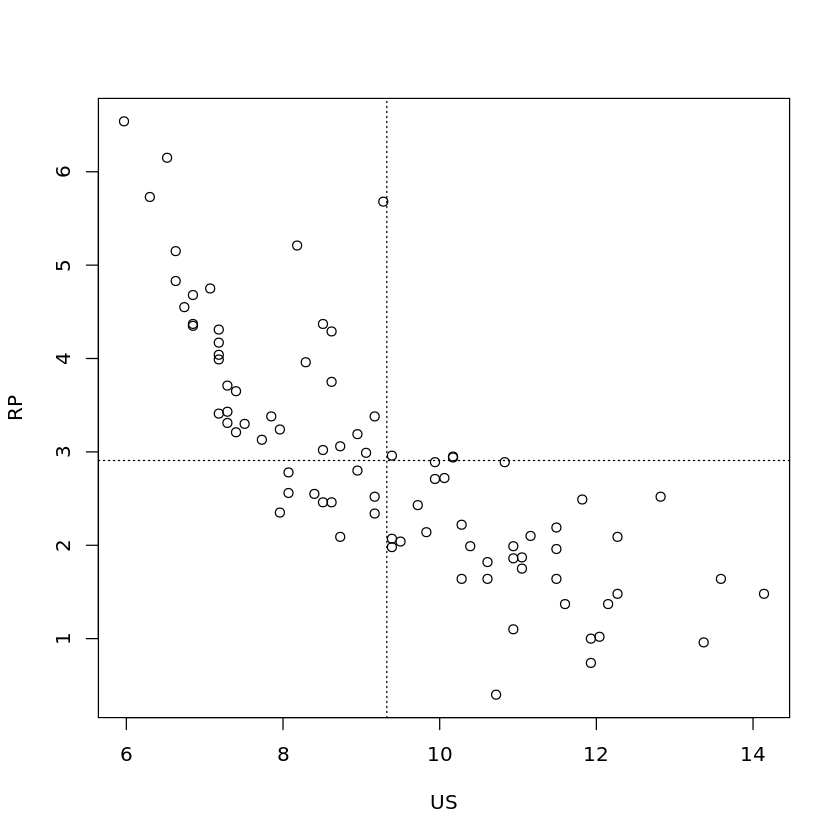

In [7]:
plot(x = US, y = RP)
abline(v = mean(US), h = mean(RP), lty = 3)

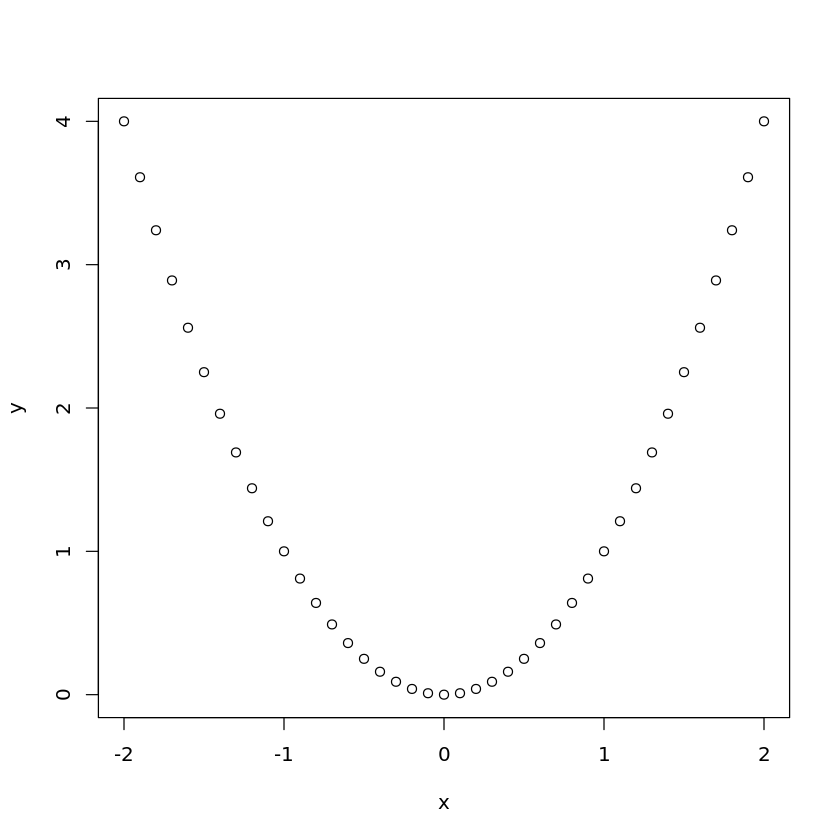

In [8]:
# a correlação é uma medida de associação linear, pois
x <- seq(-2, 2, by = 0.1)
y <- x^2
plot(x, y)

In [9]:
cor(x, y)

[1] 1.775033e-16

____
**Teste da correlação**

In [10]:
cor.test(x = US, y = RP)


	Pearson's product-moment correlation

data:  US and RP
t = -12.042, df = 82, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8653465 -0.7057680
sample estimates:
       cor 
-0.7992292 


___
**Correlações não paramétricas**

In [11]:
# Coeficiente de Spearman
cor(RP, US, method = "spearman")

[1] -0.8606981

In [12]:
# Coeficiente de Kendall
cor(RP, US, method = "kendall")

[1] -0.6888641

____
**Gráfico de draftsman**

Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



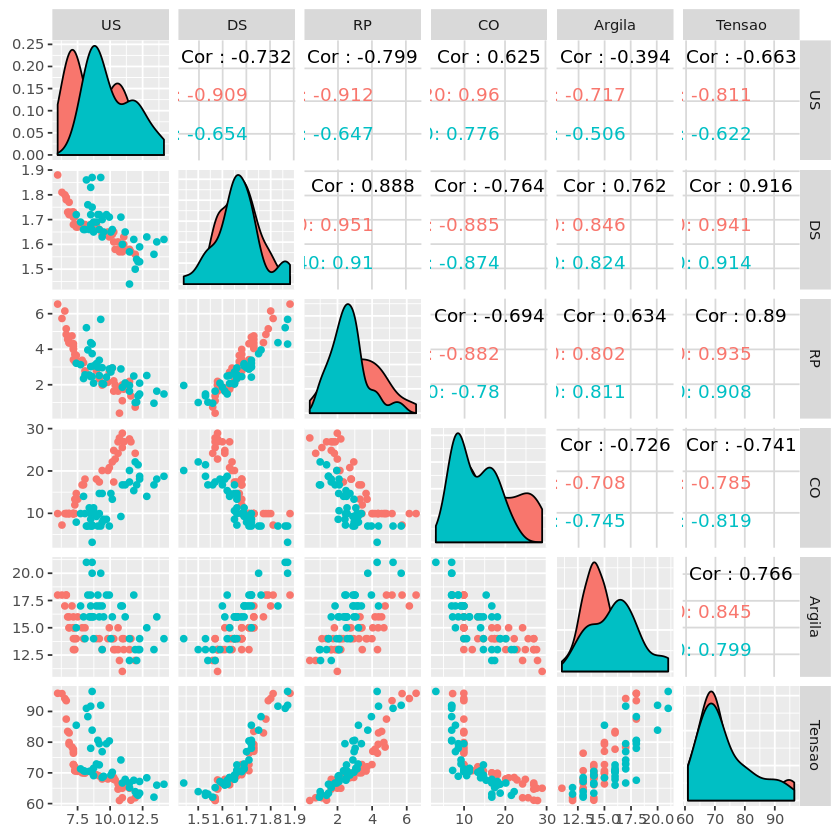

In [13]:
library(GGally)
ggpairs(data = solo, columns = 1:6, ggplot2::aes(colour = Camada))

___
**Matrizes de covariância e de correlação**

In [14]:
covsolo <- cov(solo[, -7])
round(covsolo, 2)

,US,DS,RP,CO,Argila,Tensao
US,3.75,-0.12,-1.99,7.75,-1.63,-11.69
DS,-0.12,0.01,0.10,-0.41,0.14,0.71
RP,-1.99,0.10,1.65,-5.73,1.74,10.42
CO,7.75,-0.41,-5.73,41.12,-9.92,-43.31
Argila,-1.63,0.14,1.74,-9.92,4.54,14.88
Tensao,-11.69,0.71,10.42,-43.31,14.88,82.99


In [15]:
# computando a matriz de correlação pela de covariâncias
corsolo <- cov2cor(covsolo)
round(corsolo, 2)

,US,DS,RP,CO,Argila,Tensao
US,1.00,-0.73,-0.80,0.62,-0.39,-0.66
DS,-0.73,1.00,0.89,-0.76,0.76,0.92
RP,-0.80,0.89,1.00,-0.69,0.63,0.89
CO,0.62,-0.76,-0.69,1.00,-0.73,-0.74
Argila,-0.39,0.76,0.63,-0.73,1.00,0.77
Tensao,-0.66,0.92,0.89,-0.74,0.77,1.00


____
**Representação gráfica de matrizes de correlação**

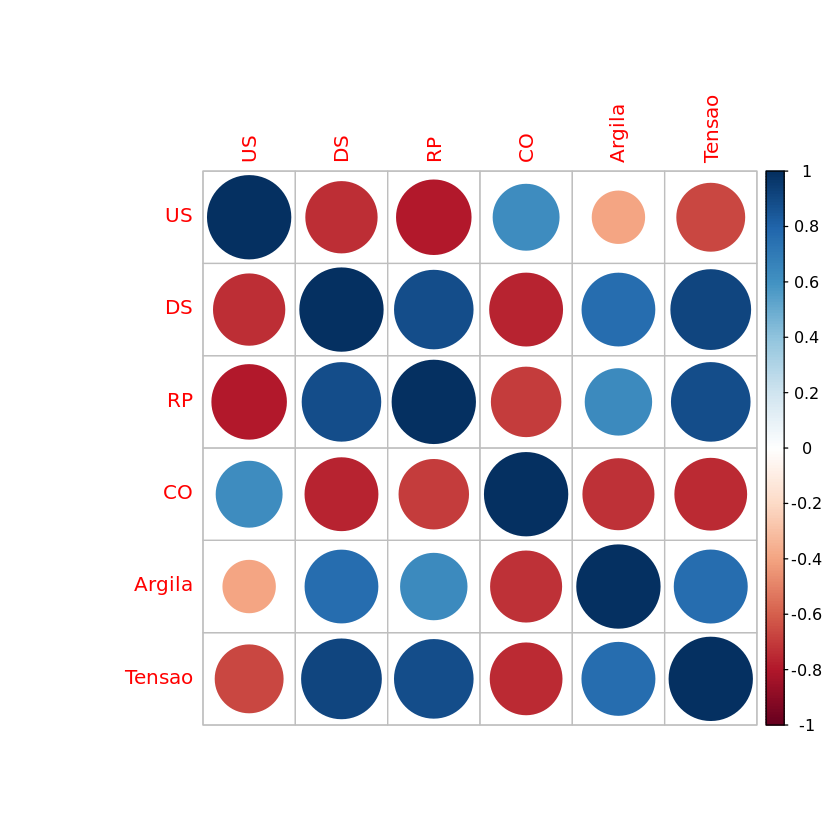

In [16]:
# gráfico de correlação
library(corrplot)
corrplot(corsolo)

In [17]:
# rede de correlações
library(qgraph)
qgraph(corsolo, layout = "spring", edge.labels = TRUE)

ERROR: Error in library(qgraph): there is no package called ‘qgraph’


_____
**Inferência sobre matrizes de correlação**

*Testes simultâneos*

In [ ]:
library(biotools)
multcor.test(corsolo, n = nrow(solo))

*Estrutura especificada de correlação*

In [23]:
# TRV para H0: ausência de correlação na matriz
y <- scale(solo[, -7])  # dados solo padronizados (média 0 e variância 1 para cada variável)
round(cov(y), 2)        # matriz cov = cor
p <- ncol(y)            # número de variáveis
cov.H0 <- diag(p)       # matriz de correlação sob H0
cov.H0

,US,DS,RP,CO,Argila,Tensao
US,1.00,-0.73,-0.80,0.62,-0.39,-0.66
DS,-0.73,1.00,0.89,-0.76,0.76,0.92
RP,-0.80,0.89,1.00,-0.69,0.63,0.89
CO,0.62,-0.76,-0.69,1.00,-0.73,-0.74
Argila,-0.39,0.76,0.63,-0.73,1.00,0.77
Tensao,-0.66,0.92,0.89,-0.74,0.77,1.00


1,0,0,0,0,0
0,1,0,0,0,0
0,0,1,0,0,0
0,0,0,1,0,0
0,0,0,0,1,0
0,0,0,0,0,1


In [25]:
# TRV
library(mvtnorm)
logL.H0 <- sum(dmvnorm(x = y, mean = colMeans(y), sigma = cov.H0, log = TRUE))   # logL sob H0
logL.H1 <- sum(dmvnorm(x = y, mean = colMeans(y), sigma = cov(y), log = TRUE))   # logL irrestrita
LR <- 2*(logL.H1 - logL.H0)                                                      # estatística de teste
1 - pchisq(LR, df = choose(p, 2))                                                # p-valor

[1] 0

*Homogeneidade de matrizes de covariância*

Teste M de Box para $H_0: \Sigma_1 = \Sigma_2 = ... = \Sigma_k = \Sigma$

In [26]:
boxM(data = solo[, -7], grouping = solo[, 7])

ERROR: Error in boxM(data = solo[, -7], grouping = solo[, 7]): could not find function "boxM"


____
**Correlações parciais**

In [27]:
# original
cor(RP, US)

# parcial (RP,US) | DS
(cor(RP, US) - cor(RP, DS)*cor(US, DS)) / sqrt((1 - cor(RP, DS)^2) * (1 - cor(US, DS)^2))

[1] -0.7992292

[1] -0.4772121

In [28]:
# matriz de correlações parciais para todos os pares de variáveis de solo, fixadas as restantes
R <- cor(solo[, -7])
C <- solve(R)
P <- -cov2cor(C)
round(P, 2)

,US,DS,RP,CO,Argila,Tensao
US,-1.00,-0.27,-0.48,0.31,0.37,0.19
DS,-0.27,-1.00,0.23,-0.09,0.32,0.43
RP,-0.48,0.23,-1.00,0.08,-0.07,0.50
CO,0.31,-0.09,0.08,-1.00,-0.40,-0.09
Argila,0.37,0.32,-0.07,-0.40,-1.00,0.23
Tensao,0.19,0.43,0.50,-0.09,0.23,-1.00


In [5]:
detach(solo)